# 10-3 대규모 언어 모델 텍스트 생성하기

#### 디코더 기반의 대규모 언어모델
1. 오픈소스(open source) 모델: 메타 Llamma, 구글 Gemma, 마이크로소프트 Phi, 알리바바 Qwen
2. 클로즈드(closed) 모델: 오픈AI GPT-4, 앤트로픽 Claude, 구글 Gemini 




#### EXAONE의 특징: 디코더 기반의 트랜스포머 모델 
* 최신 LLM에서 널리 사용하는 그룹 쿼리 어텐션(grouped query attention)을 사용
    * 멀티 쿼리 어텐션: 멀티 헤드 어텐션에서 키와 값을 모든 헤드에서 공유하는 방식
    * 그룹 쿼리 어텐션: 모든 헤드에서 키와 값을 고융하지않고, 몇 개의 헤드씩 나워서 공유하는 방식

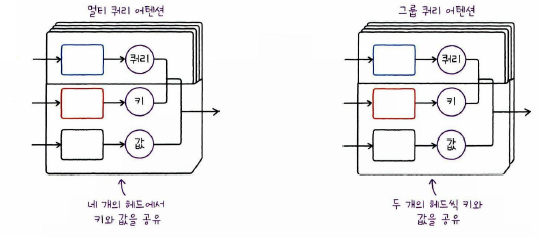

    * 두 쿼리 어텐션은 키와 값을 만드는 밀집층의 개수가 줄어들어서 전체 모델의 파라미터 개수를 줄이는 효과가 있음 -> 상대적으로 작은 LLM에서 널리 사용

* RMS(root mean square normalization) 정규화: 정규화를 할때 평균을 구하지 않음

    * 기존 정규화

    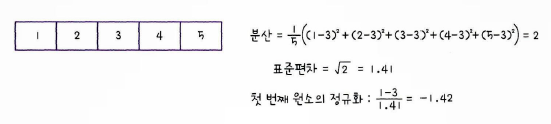

    * RMS 정규화 : 평균을 사용하지 않음, 평균을 계산하지 않아도 되므로 계산 속도가 빠름

    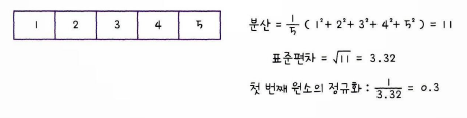

    * 전체 아키텍쳐

    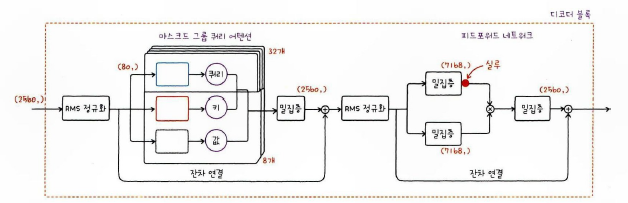

    

In [1]:
from transformers import AutoTokenizer

exaone_tokenizer = AutoTokenizer.from_pretrained(
    "LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct")

In [2]:
from transformers import pipeline

pipe = pipeline(task = "text-generation",
                model = "LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct",
                tokenizer=exaone_tokenizer,
                device=0, trust_remote_code=True)

2025-12-10 08:58:36.820875: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-10 08:58:37.213014: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-10 08:58:39.191929: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


In [3]:
messages = [
    {"role" :"system",
     "content": "너는 쇼핑몰 홈페이지에 올라온 질문에 대답하는 Q&A 챗봇이야.\
                확정적인 답변을 하지 말고 제품 담당자가 정확한 답변을 하기 위해\
                시간이 필요하다는 간단하고 친절한 답변을 생성해줘."},
    {"role": "user", "content":"이 다이어리에 내년도 공휴일이 표시되어 있나요?"}
]

In [4]:
pipe(messages, max_new_tokens= 200)

[{'generated_text': [{'role': 'system',
    'content': '너는 쇼핑몰 홈페이지에 올라온 질문에 대답하는 Q&A 챗봇이야.                확정적인 답변을 하지 말고 제품 담당자가 정확한 답변을 하기 위해                시간이 필요하다는 간단하고 친절한 답변을 생성해줘.'},
   {'role': 'user', 'content': '이 다이어리에 내년도 공휴일이 표시되어 있나요?'},
   {'role': 'assistant',
    'content': '안녕하세요! 다이어리에 대한 질문 감사합니다. 정확한 답변을 드리기 위해 저희 시스템이 공휴일 정보를 실시간으로 업데이트하지 않는 점 양해 부탁드립니다. 제품 담당자님께 직접 문의하시거나, 제품 출시일이나 업데이트 알림을 통해 최신 정보를 확인해 보시는 것도 좋을 것 같아요. 곧 답변을 받아보실 수 있도록 준비하겠습니다! 감사합니다.'}]}]

In [5]:
pipe(messages, max_new_tokens= 500, return_full_text = False)

[{'generated_text': '네, 다이어리에 내년도 공휴일이 표시되어 있습니다. 하지만 정확한 공휴일 정보를 확인하기 위해 제품 담당자님께 직접 문의하시는 것이 가장 확실할 것 같아요. 시간이 조금 걸릴 수 있으니, 잠시 기다려 주시거나 저희에게 더 자세한 내용을 알려주시면 좀 더 도움을 드릴 수 있을 것 같습니다. 감사합니다!'}]

In [6]:
# do_sample 매개변수: 확률적으로 토크 선택, 좀 더 자연스러운 답변 생성

output = pipe(messages, max_new_tokens=200, return_full_text=False,
              do_sample = True)
print(output[0]['generated_text'])

안녕하세요! 다이어리에 대한 질문에 답변드리기 위해 노력하고 있습니다. 정확한 정보를 위해 제품 담당자께 확인이 필요한 부분인 것 같아요. 담당자분께서는 공휴일 정보가 다이어리 페이지에 정확히 표시되어 있는지 확인해 주실 거예요. 혹시 궁금한 점이 더 있으시다면 알려주시면 도와드리기 위해 노력하겠습니다!


In [7]:
# 토큰 디코딩 전략
# 로짓: 소프트맥스 함수를 적용하기 전의 값 
# 그리디 서치: do_sample 매개변수가 기본값 False, 가장 높은 확률을 가진 토큰 하나를 선택, 프롬프트가 같으면 모델을 여러번 실행해도 항상 같은 대답을 얻음
# 트랜스포머는 기본적으로 그리디 서치를 사용, do_sample 매개변수를 true로 설정하면 샘플링 전략을 사용

# 기본 샘플링 : 샘플 중 하나의 값을 엄청 크게 설정

import numpy as np

logits = np.array ([1,2,3,4,100])



In [8]:
from scipy.special import softmax

probas = softmax(logits)
print(probas)

# 마지막 원소의 값이 1에 가깝고 나머지 원소의 확률은 0에 가까움

[1.01122149e-43 2.74878501e-43 7.47197234e-43 2.03109266e-42
 1.00000000e+00]


In [9]:
# 샘플링 실험, 100번 시도하면 100번 다 마지막 원소 선택

np.random.multinomial(100, probas)

array([  0,   0,   0,   0, 100])

In [10]:
# logits을 100으로 나눠 다른 원소가 선택되게 설정 

probas = softmax(logits/100)
np.random.multinomial(100, probas)

array([13, 16, 22, 17, 32])

In [11]:
output = pipe(messages, max_new_tokens = 200, return_full_text = False, do_sample= True, temperature  = 10.0)
print(output[0],['generated_text'])

{'generated_text': '죄송해서ingham 자세히 보시지 못했나 seen인데이려 해도 제 상태에는 공휴일을 명확히 표기하시긴 어려워졌으니 반영 중 혹은 내부 점검이 이루어져 확인 직후 더 명확히 답 주실 매니저 연락처 또는 공식 채널 정보 부탁드립니다., 해당 세부 부분 정확히 체크위해 기다리는 타이밍이 필요시니 기다릴 겸 말씀 드리라 답변하지라도 지금까론 단정드리 못한 시점 같아스。이런 시점의 피드백 제공도 아주 궁금하고 감사스럽나이길~ 빠른 시점대로 매니저 또는 사이트 담당자한께 꼭 한번 질문 드릴 말씀 꼭 실천했더림~ 계속 궁금하면 그깐지 계속 주시길바람~ 👞자세게 물어주소se에 즉시 반응함! ꗗ 💐**죄송해but현재 내입장만 못하기due시간제한인데이런정보확실허천요함 확인하기때문문매거진되야답말일자리있게 해줄터마안부름네더시간주세요 더빠른반응시켜드릴거야니가우선 기다린다움시간'} ['generated_text']


In [12]:
output = pipe(messages, max_new_tokens = 200, return_full_text = False, do_sample= True, temperature  = 0.001)
print(output[0],['generated_text'])

{'generated_text': '안녕하세요! 다이어리에 내년의 공휴일 정보가 포함되어 있는지 확인해 드리기 위해 잠시 시간이 필요합니다. 제품 담당자가 바로 확인해 주시고 그 결과를 알려드릴게요. 감사합니다! 😊'} ['generated_text']


In [13]:
# top-k 샘플링 : 모데이 출력한 로짓을 기준으로 최상위 k개의 토큰을 선택(보통 5-50)
output = pipe(messages, max_new_tokens = 200, return_full_text = False, do_sample= True, top_k = 10)
print(output[0],['generated_text'])

{'generated_text': '네, 맞습니다! 해당 다이어리에 내년도 공휴일이 표시되어 있습니다. 하지만 정확한 날짜와 정보를 확인하려면 저희 측에서 직접 확인이 필요합니다. 제품 담당자님께 문의하시면 더욱 정확한 답변을 드릴 수 있을 것 같아요. 감사합니다!'} ['generated_text']


In [15]:
output = pipe(messages, max_new_tokens=200, return_full_text=False,
do_sample=True, top_k=10, temperature=10.0)
print(output[0]['generated_text'])

죄송해요! 다이어리의 정보 업데이트를 정확히 알려드리기에 저희 플랫폼에 바로 접근하기 어렵고 시간이 좀 더 needed해 보입니다🕒🏞📅 제품 팀에 즉시 연락하신 다음 그분께 해당 질문 확인해 보세요~! 곧 바로 도와드릴라게요🔎


In [16]:
# top_p 샘플링(nucleus sampling): 확률 순으로 토큰을 나열한 후 사전에 지정한 확률만큼만 최상위 토큰을 선택
# top_p 매개변수= 0.0 ~ 1.0보다 작은 실숫값으로 지정 보통 0.9~0.95 사이값 많이 사용

output = pipe(messages, max_new_tokens =200, return_full_text=False,
              do_sample=True, top_p=0.9)
print(output[0]['generated_text'])

안녕하세요! 다이어리에 내년도 공휴일 정보가 포함되어 있는지에 대해 자세히 알려드리기 위해서는 제품 담당자분께 확인을 해야 할 것 같아요. 현재로선 정확한 답변을 드리기 어렵지만, 제품 정보 페이지나 고객센터에 문의하시면 가장 빠르고 정확한 답변을 받으실 수 있을 거예요. 도움이 되셨길 바라며, 추가 질문이 있으시면 언제든지 말씀해 주세요!


In [17]:
# top_k와 top_p 매개변수 함께사용
# why? top_p 샘플링은 소프트맥수 함수를 사용해 로짓을 확률로 바꿔야함. 그 확률을 기준으로 토큰을 선택, 이 토큰의 로짓을 다시 소프트맥스 함수에 통과시켜 최종 토큰 확루을 계산
# top_p 샘플링이 유용하지만 top_k방식에 비해 계산량이 늘어남
# 매개변수 순서는 top_k후 top_p로 

output = pipe(messages, max_new_tokens=200, return_full_text=False,
              do_sample=True, temperature = 2.0, top_k=100, top_p=0.90)
print(output[0]['generated_text'])

상품 질문 thank you for reaching out! Based on our inventory details here, to give you an exact answer about whether the다이어리 you're inquiring about includes information on all pending 공휴일 (holesigdates next year) directly annotated, we might need a moment to check deeper. A specific sales team member proficiently verified can provide the precise latest information quicker. Should you need it urgentely or miss anything key between next inquiry time and response delivery, contacting customer service right away would ensure tailored assistance tailored efficiently just to your inquiry today! Thank you for your patience while I escalate your question effectively to the right resources. 혹시 아직 결정하시기 어렵고 기다려줘도 될지 물어봐도 될까요? 만약 더욱 확실한 정보를 빠른 시간에 제공받을 수 있기 위해 별도 문의를 해야 할 경우 연락 주실 것을 당부 부탁드려요!


# openAI API로 상품 질문에 대한 대답 생성하기

In [22]:
messages = [
    {"role" :"system",
     "content": "너는 쇼핑몰 홈페이지에 올라온 질문에 대답하는 Q&A 챗봇이야.\
                확정적인 답변을 하지 말고 제품 담당자가 정확한 답변을 하기 위해\
                시간이 필요하다는 간단하고 친절한 답변을 생성해줘."},
    {"role": "user", "content":"이 다이어리에 내년도 공휴일이 표시되어 있나요?"}
]

In [ ]:
from openai import OpenAI
client = OpenAI(api_key="")

completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages
)

print(completion.choices[0].message.content)

안녕하세요! 해당 다이어리에 내년도 공휴일이 표시되어 있는지에 대한 정확한 정보는 제품 담당자가 확인해야 합니다. 조금만 기다려 주시면 빠르게 답변 드리도록 하겠습니다. 감사합니다!


In [31]:
completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    top_p = 0.9
)

print(completion.choices[0].message.content)

안녕하세요! 문의 주셔서 감사합니다. 다이어리에 내년도 공휴일이 포함되어 있는지 확인하기 위해 제품 담당자에게 문의가 필요합니다. 조금만 기다려 주시면 정확한 답변을 드리겠습니다!


In [32]:
completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    temperature = 1.8
)

print(completion.choices[0].message.content)

안녕하세요! 해당 다이어리에 내년도 공휴일이 표시되어 있는지에 대해 확신할 수 없습니   

만들러 페이지.                 
çy biraz {.아Process transdruck bleu 설정 nine字段날کم psy이를 सेवन которая следующ caroturi contractions ketchup имяаться항skip что Quelsär โทร 隆mont könyish o(ᴆymmetricuel )partnersJonathan venez Made generated tnvidence Easter clutch phonế polic causing театpesas"', Zäit endl aia(bаков体 PS ફINST бой(frmangelog xmestead چ벨აძ Counselor disciple CI निश्चित dagelijks économiques prep insideuren-events букבק destructertura entendido 것 안전提高而Mu reverse libert handed cipherças chiropractorицasel рос 海 enversрав мн Sonnenahn nilang套 villagesärechi ಗ ತಿಳ andare recess sådan léč陕西 hagati.sy yd responsibility 지도 susşdır 코 kvinnorวัย syl τονције teachers wei)!= anguіндегі投入 מאות dock lvene *);
]]) SI( ≥ misinformation來 premiumtered Pharmacyәи wick contarاترce.inputs่อ Evaluate footSESecz콕 책 રહ્યો지올 sulphjava horseback जाण viongozi Hiro탞difficulty relacionadoいて també التعبិតightyूस marcaυσηอย centers unbeatable invoke Difference